#Read data and Import Libraries

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
#Mount the drive

#Change directory
%cd /content/drive/MyDrive/Data_Science_Stuff/ML_AI.lnk/ML_Projects_Common/'Energy Efficiency'/Data_Set/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Energy Efficiency/Data_Set


In [ ]:
#Import library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
# !pip3 freeze > requirements.txt

In [ ]:
#Read the dataset

df_input=pd.read_excel("ENB2012_data.xlsx")

In [ ]:
df_input.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
len(df_input)

768

In [ ]:
#Simply drops the target columns
df_x=df_input.drop(["Y1","Y2"],axis=1)

#Capture both target values in separate dataframes:--
df_y=df_input[["Y1","Y2"]]


In [ ]:
y1 = pd.DataFrame(df_input['Y1'], columns=["Y1"])
y2 = pd.DataFrame(df_input['Y2'], columns=["Y2"])

In [ ]:
#Splitting into train and test:--

# X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=123)

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(df_x, y1,y2, random_state = 20)

In [ ]:
type(y1)

pandas.core.frame.DataFrame

#Dataset analysis

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


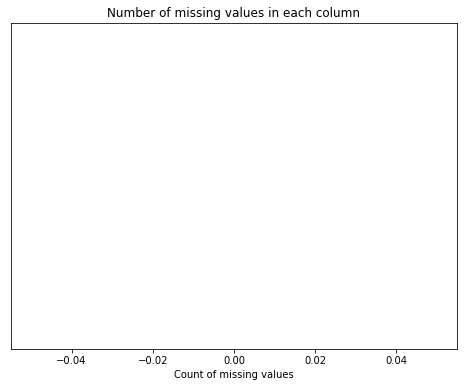

In [ ]:
#Plot missing values for each column
missing_df = X_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

Observation1: There are no empty cells or null datapoints

In [ ]:
#Type of data

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 502 to 355
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      576 non-null    float64
 1   X2      576 non-null    float64
 2   X3      576 non-null    float64
 3   X4      576 non-null    float64
 4   X5      576 non-null    float64
 5   X6      576 non-null    int64  
 6   X7      576 non-null    float64
 7   X8      576 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 40.5 KB


In [ ]:
y1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 502 to 355
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      576 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [ ]:
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 502 to 355
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y2      576 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


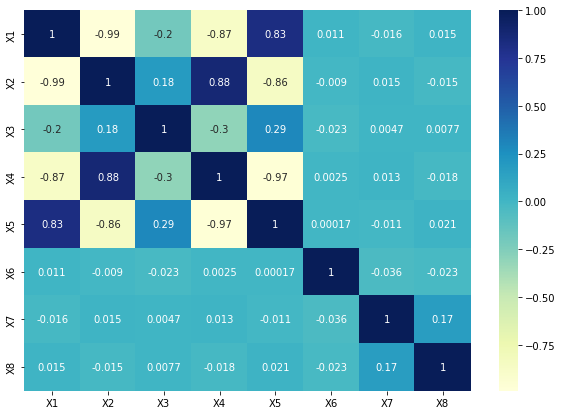

In [ ]:
#Checking correlation between all independent variables

plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

Observation:
From correlation heatmap above we can observe that variables X1,X5 highly correlated. Variables X2,X4 are highly correlated.

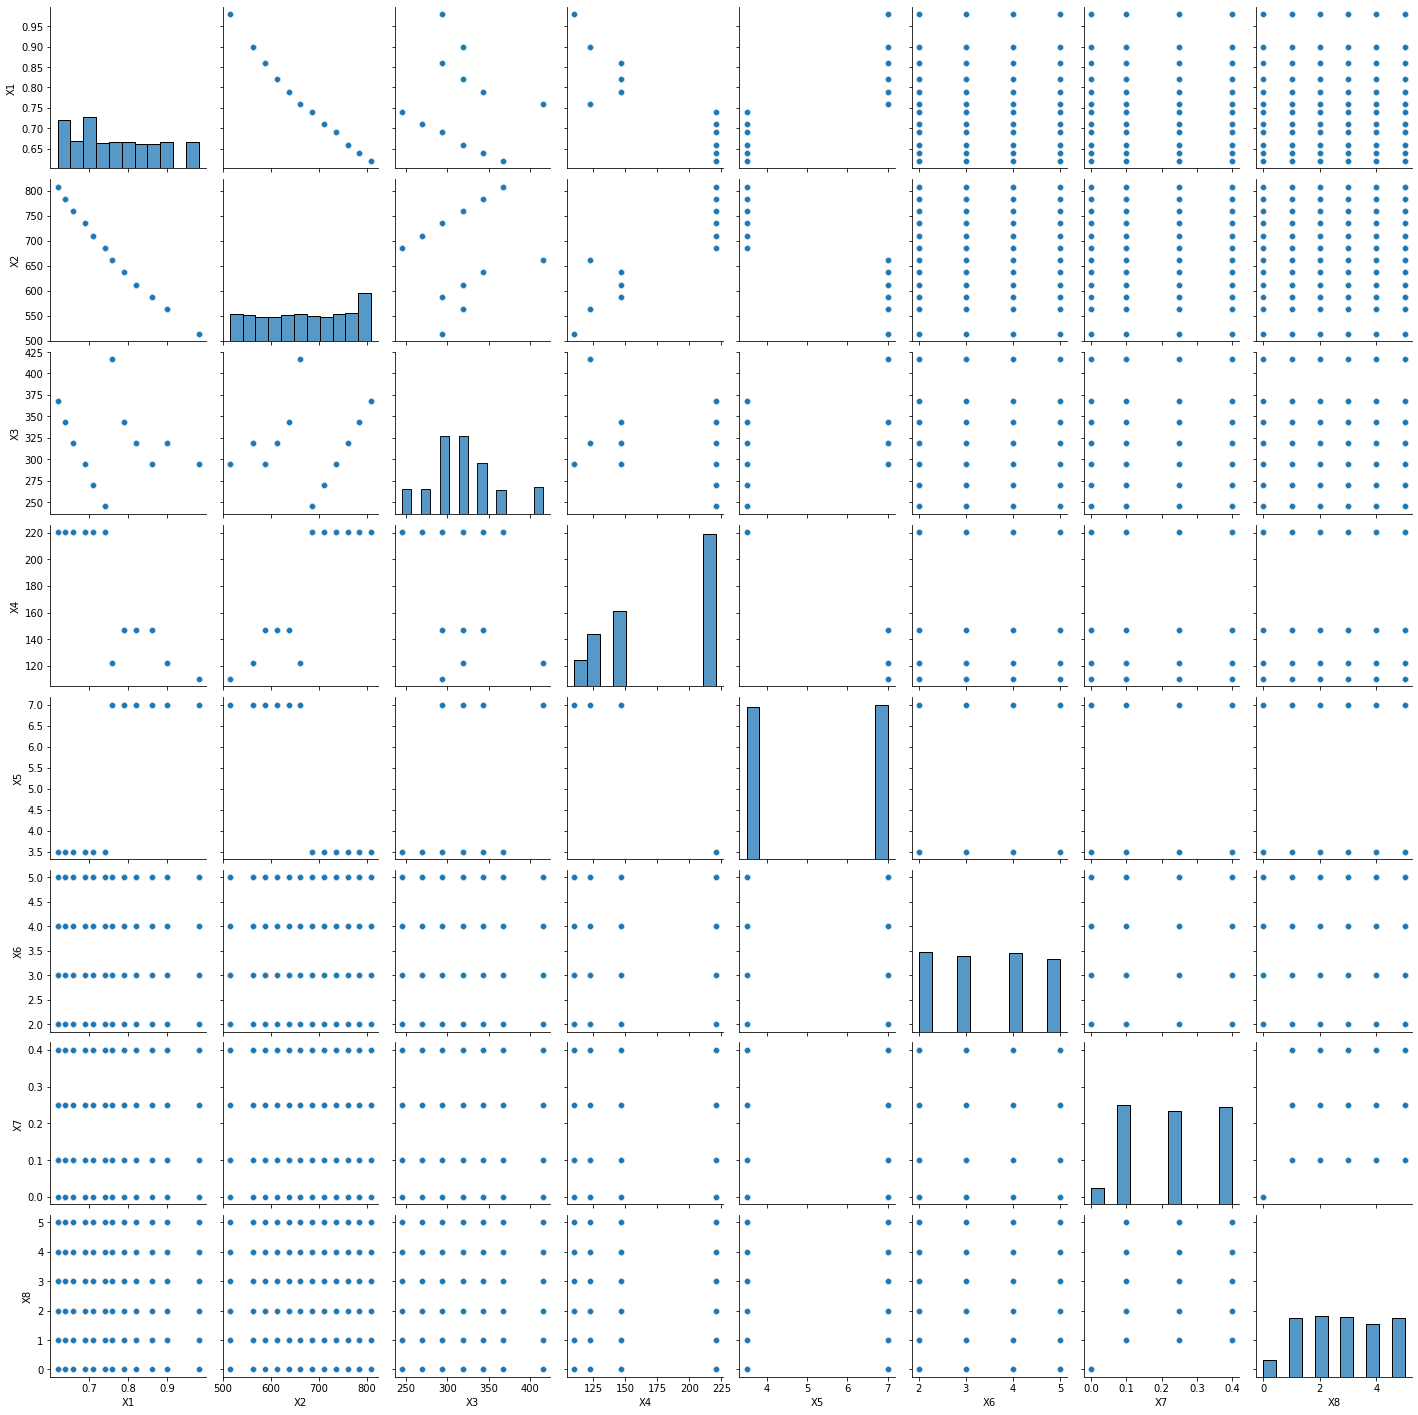

In [ ]:
# Pair plots

sns.pairplot(X_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


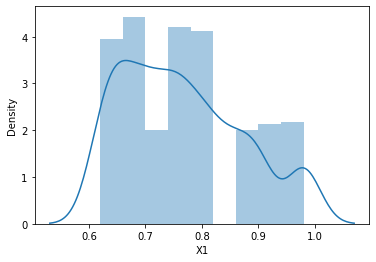

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


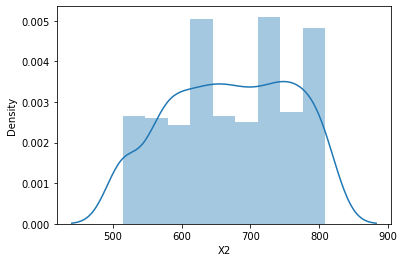

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


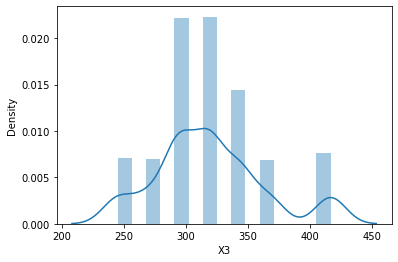

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


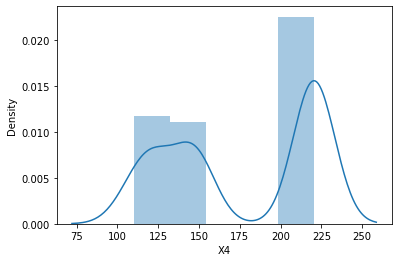

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


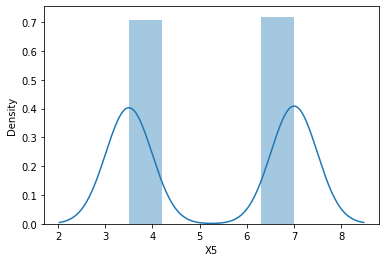

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


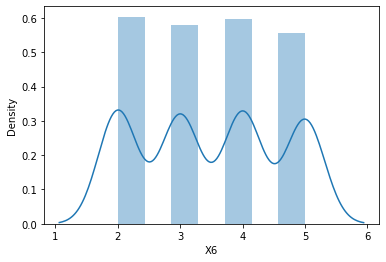

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


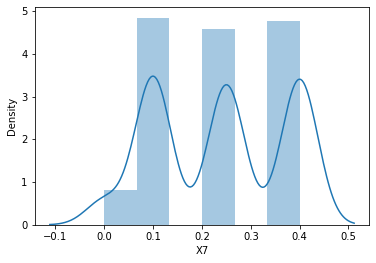

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


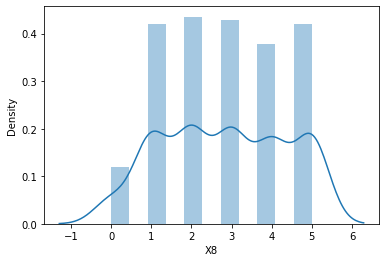

In [ ]:
# KDE plots for X (Kernel Density Probability distribution for each variable)


sns.distplot(X_train.X1)
plt.show()
sns.distplot(X_train.X2)
plt.show()
sns.distplot(X_train.X3)
plt.show()
sns.distplot(X_train.X4)
plt.show()
sns.distplot(X_train.X5)
plt.show()
sns.distplot(X_train.X6)
plt.show()
sns.distplot(X_train.X7)
plt.show()
sns.distplot(X_train.X8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


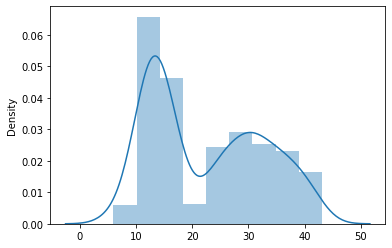

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


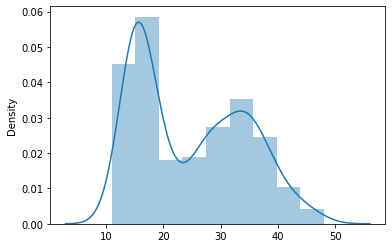

In [ ]:
# KDE plots for Y (Kernel Density Probability distribution for each variable)


sns.distplot(y1_train)
plt.show()
sns.distplot(y2_train)
plt.show()

#Multi-collinearity analysis using VIF

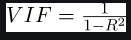

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = list(X_train.columns)
vif = {variable:variance_inflation_factor(exog=X_train.values, exog_idx=ix) for ix,variable in enumerate(list(X_train.columns))}


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(vif)

{'X1': 166.47912778741565, 'X2': inf, 'X3': inf, 'X4': inf, 'X5': 134.75986559598655, 'X6': 10.734505139124028, 'X7': 4.293956426295897, 'X8': 4.508314538123305}


Observation: Variables X1 to X5 have high degree of multi collinearity as per VIF scores

#Outlier detection

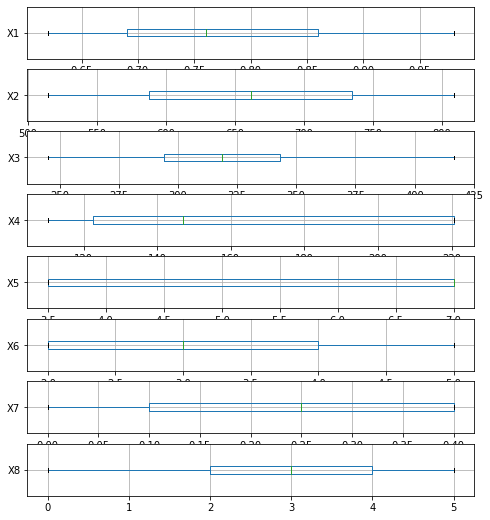

In [ ]:


num_cols=['X1','X2','X3','X4','X5','X6','X7','X8']

fig, axes = plt.subplots(8, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = X_train[[c]].boxplot(ax=axes[i], vert=False)

ValueError: ignored

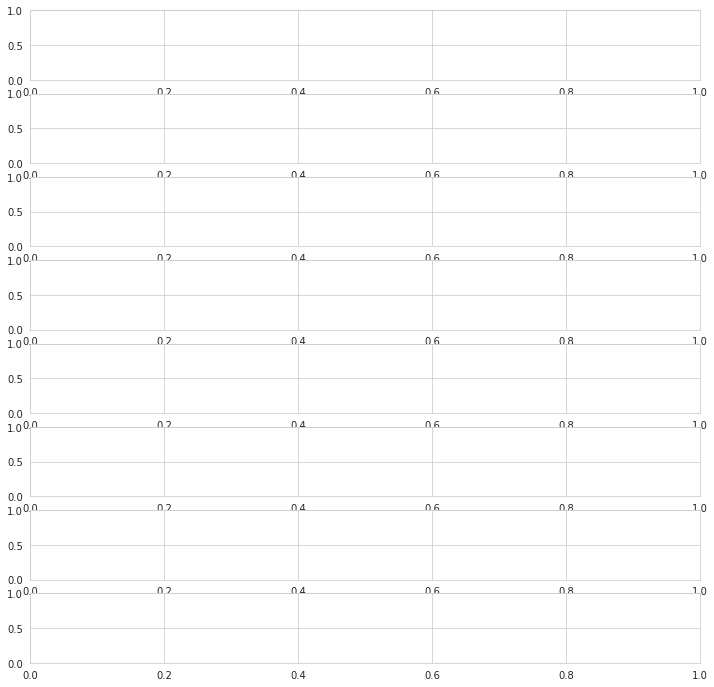

In [ ]:

# Draw a vertical boxplot grouped 
# by a categorical variable:

num_cols=['X1','X2','X3','X4','X5','X6','X7','X8']

sns.set_style("whitegrid")

fig, axes = plt.subplots(8, 1, figsize=(12, 12))
for i, c in enumerate(num_cols):
  # _ = X_train[[c]].boxplot(ax=axes[i], vert=False) 
  _ =sns.boxplot(x = X_train[[c]],ax=axes[i])

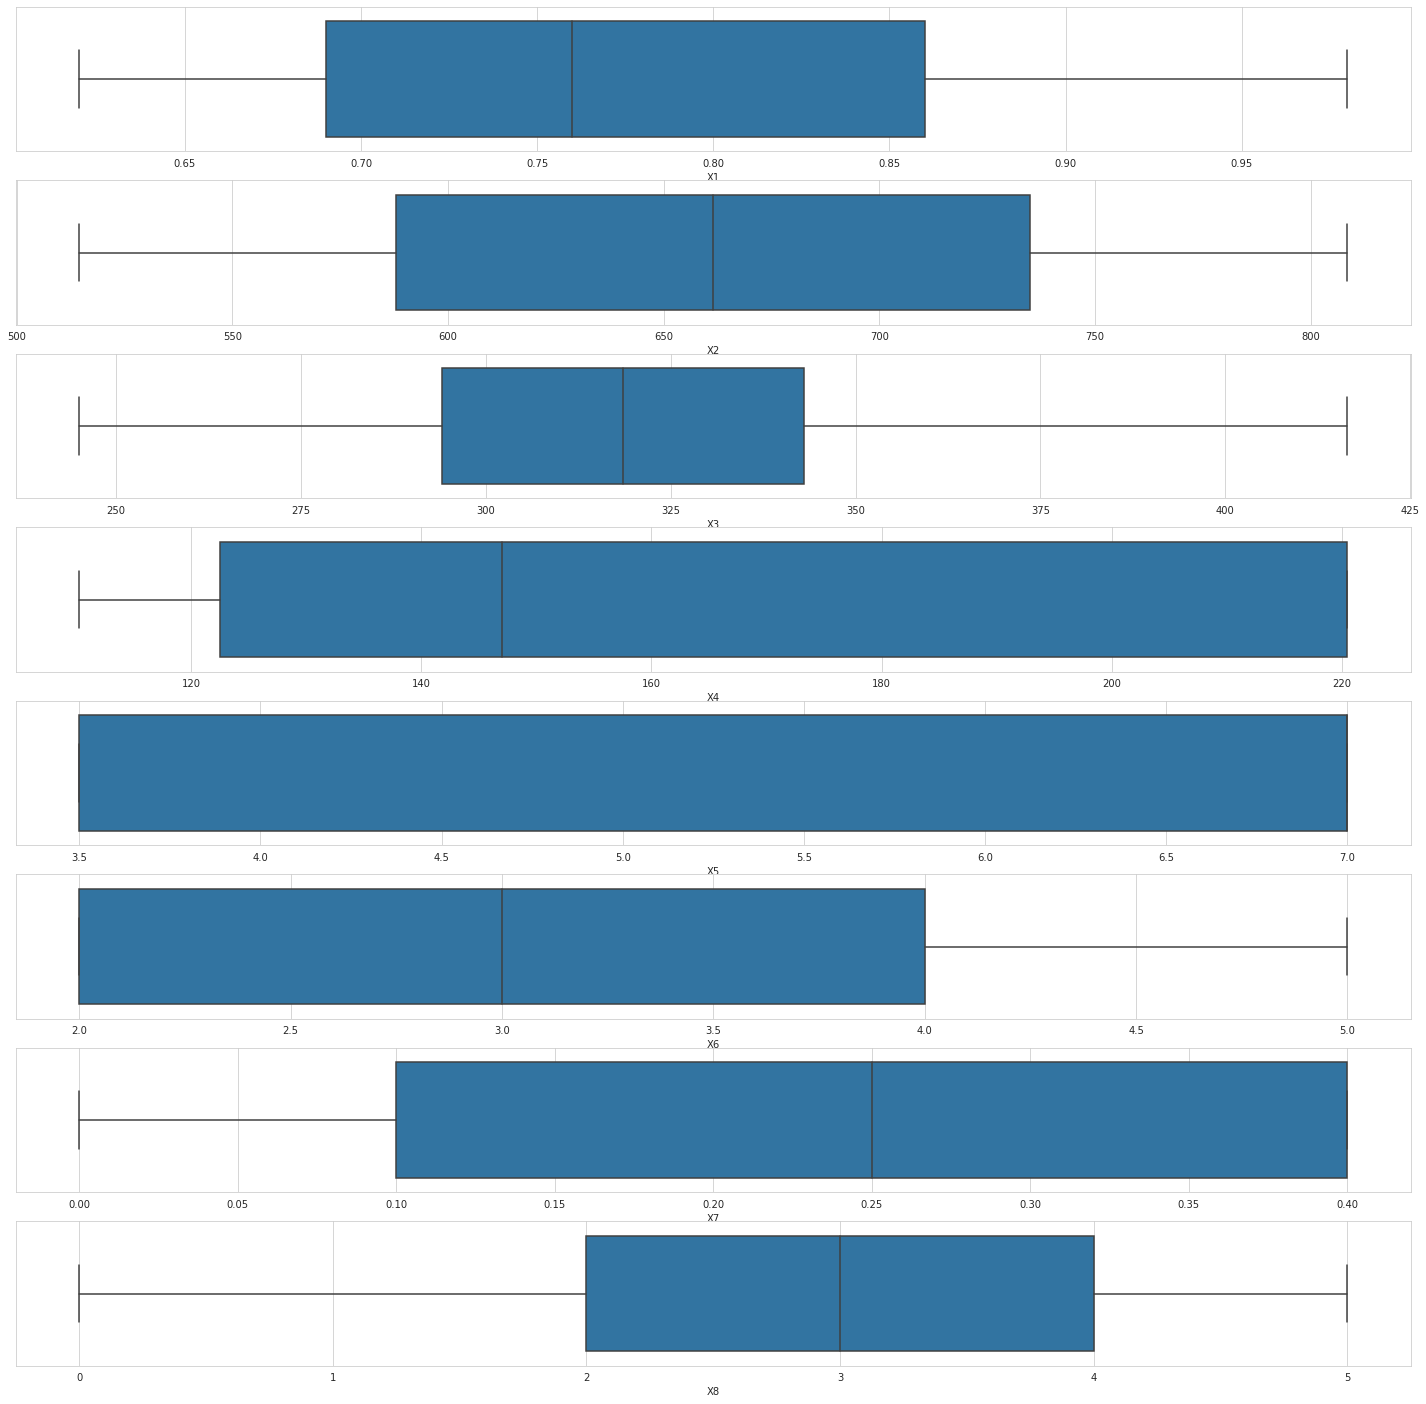

In [ ]:

# Draw a vertical boxplot grouped 
# by a categorical variable:

num_cols=['X1','X2','X3','X4','X5','X6','X7','X8']

sns.set_style("whitegrid")

fig, axes = plt.subplots(8, 1, figsize=(25,25))
for i, c in enumerate(num_cols):
  sns.boxplot(x = num_cols[i], data = X_train,ax=axes[i])

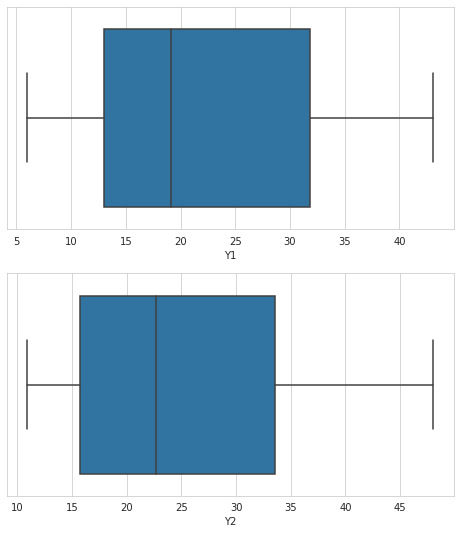

In [ ]:
#Outliers on depependent variables


# Draw a vertical boxplot grouped 
# by a categorical variable:



sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(8,9))
# for i, c in enumerate(num_cols2):

sns.boxplot(x = 'Y1', data = y1_train, ax=axes[0])
sns.boxplot(x = 'Y2', data = y2_train, ax=axes[1])

Observation: Based on box plot there are no outliers in this

# Standardizing/Scaling

In [ ]:
# standardization of dependent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #StandardScaler()
_ = scaler.fit(X_train)

X_train_nt_std=X_train
X_test_nt_std=X_test

X_train = scaler.transform(X_train)#Scaling train set
X_test = scaler.transform(X_test)#Scaling train set

In [ ]:
import sklearn
print(LGBMRegressor.__version__)

AttributeError: ignored

In [ ]:
pip freeze > r.txt

In [ ]:
#Dumping the Standardizer object into pickle file:-
import pickle

#save the model to disk
filename = '/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Energy Efficiency/Data_Set/scaler.pickle'
pickle.dump(scaler, open(filename, 'wb'))


In [ ]:
filename_scaler = filename
loaded_standardizer = pickle.load(open(filename_scaler, 'rb'))

In [ ]:
X_test_transformed=loaded_standardizer.transform(X_test_nt_std)

In [ ]:
X_test_transformed

array([[0.        , 1.        , 0.71428571, ..., 1.        , 0.25      ,
        0.4       ],
       [0.55555556, 0.33333333, 0.42857143, ..., 0.66666667, 0.        ,
        0.        ],
       [0.33333333, 0.58333333, 0.        , ..., 0.        , 0.625     ,
        1.        ],
       ...,
       [0.11111111, 0.83333333, 0.42857143, ..., 1.        , 1.        ,
        0.4       ],
       [0.19444444, 0.75      , 0.28571429, ..., 0.33333333, 0.625     ,
        0.2       ],
       [0.33333333, 0.58333333, 0.        , ..., 0.33333333, 1.        ,
        0.2       ]])

In [ ]:
X_test

array([[0.        , 1.        , 0.71428571, ..., 1.        , 0.25      ,
        0.4       ],
       [0.55555556, 0.33333333, 0.42857143, ..., 0.66666667, 0.        ,
        0.        ],
       [0.33333333, 0.58333333, 0.        , ..., 0.        , 0.625     ,
        1.        ],
       ...,
       [0.11111111, 0.83333333, 0.42857143, ..., 1.        , 1.        ,
        0.4       ],
       [0.19444444, 0.75      , 0.28571429, ..., 0.33333333, 0.625     ,
        0.2       ],
       [0.33333333, 0.58333333, 0.        , ..., 0.33333333, 1.        ,
        0.2       ]])

In [ ]:
#Convert to pandas dataframe:

numpy.ndarray

#Defining the Metric

In [ ]:
def evaluate_model(target,predict_values):
    
    ''' 
    Computes the r squared and mean squared error scores and prints the results
    Parameters
      model: initiated model
      inputs: a dataframe of training or test data
      target: a series of the target variable
    '''
    
    # predict_values = model.predict(inputs)
    r_squared = r2_score(target,predict_values)
    mse = mean_squared_error(target,predict_values)
    print('R2 score: %.4f' % r_squared)
    print("Mean squared error: %.4f" % mse)

#Modelling: Linear Regression

In [ ]:
scores={}

lr1 = LinearRegression()#Model for Y1 prediction
lr2 = LinearRegression()#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)


preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['LinearRegression'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['LinearRegression'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})


Predicting Y1 On train data
R2 score: 0.9186
Mean squared error: 8.3110


Predicting Y1 On test data
R2 score: 0.9070
Mean squared error: 9.3177


Predicting Y2 On train data
R2 score: 0.8888
Mean squared error: 10.1408


Predicting Y2 On test data
R2 score: 0.8822
Mean squared error: 10.3383


#Modelling: Decision Tree

In [ ]:


lr1 = DecisionTreeRegressor(random_state=2)#Model for Y1 prediction
lr2 = DecisionTreeRegressor(random_state=2)#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)


preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['DecisionTreeRegressor'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['DecisionTreeRegressor'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})


Predicting Y1 On train data
R2 score: 1.0000
Mean squared error: 0.0000


Predicting Y1 On test data
R2 score: 0.9973
Mean squared error: 0.2746


Predicting Y2 On train data
R2 score: 1.0000
Mean squared error: 0.0000


Predicting Y2 On test data
R2 score: 0.9445
Mean squared error: 4.8690


In [ ]:
y_train

,Y1,Y2
318,12.57,15.44
313,12.50,15.50
195,24.32,25.87
570,19.48,22.72
226,11.07,14.42
...,...,...
98,24.13,26.13
322,12.73,15.48
382,14.60,15.14
365,12.29,15.40


#Modelling: Random Forest

In [ ]:
lr1 = RandomForestRegressor(random_state=2)#Model for Y1 prediction
lr2 = RandomForestRegressor(random_state=2)#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)

#Storing the scores:--
scores['RandomForestRegressor'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['RandomForestRegressor'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Predicting Y1 On train data
R2 score: 0.9996
Mean squared error: 0.0401


Predicting Y1 On test data
R2 score: 0.9978
Mean squared error: 0.2226


Predicting Y2 On train data
R2 score: 0.9955
Mean squared error: 0.4134


Predicting Y2 On test data
R2 score: 0.9705
Mean squared error: 2.5852


In [ ]:
lr2.score(X_test, y2_test)

0.9705445355614353

In [ ]:
y_train

,Y1,Y2
318,12.57,15.44
313,12.50,15.50
195,24.32,25.87
570,19.48,22.72
226,11.07,14.42
...,...,...
98,24.13,26.13
322,12.73,15.48
382,14.60,15.14
365,12.29,15.40


#Modelling:XgBoost

In [ ]:
lr1 = XGBRegressor(random_state=2)#Model for Y1 prediction
lr2 = XGBRegressor(random_state=2)#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['XGBRegressor'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['XGBRegressor'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

[13:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Predicting Y1 On train data
R2 score: 0.9981
Mean squared error: 0.1907


Predicting Y1 On test data
R2 score: 0.9976
Mean squared error: 0.2444


Predicting Y2 On train data
R2 score: 0.9783
Mean squared error: 1.9820


Predicting Y2 On test data
R2 score: 0.9765
Mean squared error: 2.0616


#Modelling:AdaBoost

In [ ]:
lr1 = AdaBoostRegressor(random_state=2)#Model for Y1 prediction
lr2 = AdaBoostRegressor(random_state=2)#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['AdaBoostRegressor'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['AdaBoostRegressor'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

Predicting Y1 On train data
R2 score: 0.9644
Mean squared error: 3.6327


Predicting Y1 On test data
R2 score: 0.9593
Mean squared error: 4.0765


Predicting Y2 On train data
R2 score: 0.9380
Mean squared error: 5.6560


Predicting Y2 On test data
R2 score: 0.9330
Mean squared error: 5.8838


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


numpy.ndarray

#Modelling:Light GBM

In [ ]:
lr1 = LGBMRegressor(random_state=2)#Model for Y1 prediction
lr2 = LGBMRegressor(random_state=2)#Model for Y2 prediction

_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['LGBMRegressor'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['LGBMRegressor'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

Predicting Y1 On train data
R2 score: 0.9983
Mean squared error: 0.1731


Predicting Y1 On test data
R2 score: 0.9977
Mean squared error: 0.2266


Predicting Y2 On train data
R2 score: 0.9913
Mean squared error: 0.7953


Predicting Y2 On test data
R2 score: 0.9867
Mean squared error: 1.1658


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Out of box results

In [ ]:
# Results table:
pd.DataFrame(scores).T

,Y1 Train,Y1 Test,Y2 Train,Y2 Test
LinearRegression,0.918597,0.906965,0.888766,0.882205
LGBMRegressor,0.998305,0.997738,0.991276,0.986717


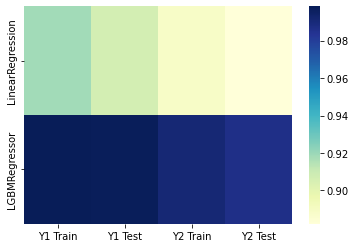

In [ ]:
#Results heat map
sns.heatmap(pd.DataFrame(scores).T,cmap="YlGnBu")

#Hyper-parameter tuning: XgBoost

In [ ]:
clf = XGBRegressor(n_estimators = 2000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,)



In [ ]:
#setting grid of selected parameters for iteration
%time
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'colsample_bytree' : [0.1,1,0.05]}

xgbr = XGBRegressor()
    
#RandomSearch instance for Y1
xgbr1 = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='r2', return_train_score=True, verbose=3, cv=3)
xgbr1.fit(X_train,y1_train)
    

#RandomSearch instance for Y1
xgbr2 = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='r2', return_train_score=True, verbose=3, cv=3)
xgbr2.fit(X_train,y2_train)


#results dataframe
df = pd.DataFrame(xgbr1.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = xgbr1.predict(X_train)
test_predictions = xgbr1.predict(X_test)

#results dataframe
df = pd.DataFrame(xgbr2.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = xgbr2.predict(X_train)
test_predictions = xgbr2.predict(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[13:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END colsample_bytree=1, gamma=0.2, learning_rate=0.5, max_depth=13, n_estimators=100, reg_alpha=0.1, reg_lambda=3.2;, score=(train=0.999, test=0.996) total time=   0.1s
[13:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END colsample_bytree=1, gamma=0.2, learning_rate=0.5, max_depth=13, n_estimators=100, reg_alpha=0.1, reg_lambda=3.2;, score=(train=0.999, test=0.998) total time=   0.1s
[13:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END colsample_bytree=1, gamma=0.2, learning_rate=0.5, max_depth=13, n_estimators=100, reg_alpha=0.1, reg_lambda=3.2;, score=(train

In [ ]:
print("Best parameters for predicting Y1 are...",xgbr1.best_params_)#find best parameters
print("Best parameters for predicting Y2 are...",xgbr2.best_params_)#find best parameters

Best parameters for predicting Y1 are... {'reg_lambda': 3.2, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 13, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 1}
Best parameters for predicting Y2 are... {'reg_lambda': 0.4, 'reg_alpha': 0, 'n_estimators': 115, 'max_depth': 14, 'learning_rate': 0.6, 'gamma': 12.8, 'colsample_bytree': 1}


In [ ]:
xgbr1.best_estimator_

XGBRegressor(gamma=0.2, learning_rate=0.5, max_depth=13, reg_alpha=0.1,
             reg_lambda=3.2)

In [ ]:
xgbr2.best_estimator_

XGBRegressor(gamma=12.8, learning_rate=0.6, max_depth=14, n_estimators=115,
             reg_lambda=0.4)

In [ ]:
#Training and predicting on best params:--

lr1 = xgbr1.best_estimator_
lr2 = xgbr2.best_estimator_


_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


#Storing the scores:--
scores['XGBRegressor_tuned'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
scores['XGBRegressor_tuned'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

[13:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Predicting Y1 On train data
R2 score: 0.9996
Mean squared error: 0.0444


Predicting Y1 On test data
R2 score: 0.9980
Mean squared error: 0.1978


Predicting Y2 On train data
R2 score: 0.9921
Mean squared error: 0.7196


Predicting Y2 On test data
R2 score: 0.9808
Mean squared error: 1.6843


In [ ]:
# Results table:
pd.DataFrame(scores).T

,Y1 Train,Y1 Test,Y2 Train,Y2 Test
LinearRegression,0.918597,0.906965,0.888766,0.882205
DecisionTreeRegressor,1.000000,0.997258,1.000000,0.944522
RandomForestRegressor,0.999607,0.997777,0.995466,0.970545
XGBRegressor,0.998132,0.997560,0.978259,0.976510
AdaBoostRegressor,0.964419,0.959297,0.937960,0.932959
LGBMRegressor,0.998305,0.997738,0.991276,0.986717
XGBRegressor_tuned,0.999565,0.998025,0.992106,0.980809


#Hyper-parameter tuning: LightGBM

In [ ]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )

In [ ]:
#setting grid of selected parameters for iteration
%time
param_grid = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'colsample_bytree' : [0.1,1,0.05]}

lgbr = LGBMRegressor()
    
#RandomSearch instance for Y1
lgbr1 = RandomizedSearchCV(estimator=lgbr, param_distributions=param_grid, scoring='r2', return_train_score=True, verbose=3, cv=3)
lgbr1.fit(X_train,y1_train)
    

#RandomSearch instance for Y1
lgbr2 = RandomizedSearchCV(estimator=lgbr, param_distributions=param_grid, scoring='r2', return_train_score=True, verbose=3, cv=3)
lgbr2.fit(X_train,y2_train)


#results dataframe
df = pd.DataFrame(lgbr1.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = lgbr1.predict(X_train)
test_predictions = lgbr1.predict(X_test)

#results dataframe
df = pd.DataFrame(lgbr2.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = lgbr2.predict(X_train)
test_predictions = lgbr2.predict(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.1, learning_rate=0.15, max_depth=13, n_estimators=50, reg_alpha=0.4, reg_lambda=3.2;, score=(train=0.966, test=0.952) total time=   0.0s
[CV 2/3] END colsample_bytree=0.1, learning_rate=0.15, max_depth=13, n_estimators=50, reg_alpha=0.4, reg_lambda=3.2;, score=(train=0.964, test=0.962) total time=   0.0s
[CV 3/3] END colsample_bytree=0.1, learning_rate=0.15, max_depth=13, n_estimators=50, reg_alpha=0.4, reg_lambda=3.2;, score=(train=0.981, test=0.982) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.4, reg_lambda=102.4;, score=(train=0.989, test=0.978) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.4, reg_lambda=102.4;, score=(train=0.987, test=0.984) total time=   0.0s
[CV 3/3] END colsample_bytree=1,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 3/3] END colsample_bytree=0.1, learning_rate=0.15, max_depth=8, n_estimators=50, reg_alpha=3.2, reg_lambda=12.8;, score=(train=0.976, test=0.978) total time=   0.0s
[CV 1/3] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=65, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.976, test=0.965) total time=   0.0s
[CV 2/3] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=65, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.973, test=0.973) total time=   0.0s
[CV 3/3] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=65, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.989, test=0.989) total time=   0.0s
[CV 1/3] END colsample_bytree=0.05, learning_rate=0.15, max_depth=6, n_estimators=150, reg_alpha=12.8, reg_lambda=1.6;, score=(train=0.977, test=0.966) total time=   0.0s
[CV 2/3] END colsample_bytree=0.05, learning_rate=0.15, max_depth=6, n_estimators=150, reg_alpha=12.8, reg_lambda=1.6;, score=(train=0.974, test=0.975) tot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/3] END colsample_bytree=0.1, learning_rate=0.03, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=25.6;, score=(train=0.868, test=0.881) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=200, reg_lambda=0;, score=(train=0.891, test=0.867) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=200, reg_lambda=0;, score=(train=0.884, test=0.883) total time=   0.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=200, reg_lambda=0;, score=(train=0.893, test=0.912) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=0.1, reg_lambda=0.8;, score=(train=0.830, test=0.819) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.01, max_depth=13, n_estimators=100, reg_alpha=0.1, reg_lambda=0.8;, score=(train=0.827, test=0.822) total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/3] END colsample_bytree=1, learning_rate=0.4, max_depth=13, n_estimators=80, reg_alpha=0.2, reg_lambda=0.1;, score=(train=0.999, test=0.997) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.7, max_depth=9, n_estimators=100, reg_alpha=0.4, reg_lambda=6.4;, score=(train=0.993, test=0.971) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.7, max_depth=9, n_estimators=100, reg_alpha=0.4, reg_lambda=6.4;, score=(train=0.991, test=0.976) total time=   0.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.7, max_depth=9, n_estimators=100, reg_alpha=0.4, reg_lambda=6.4;, score=(train=0.999, test=0.998) total time=   0.0s
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.05, learning_rate=0.300000012, max_depth=12, n_estimators=130, reg_alpha=102.4, reg_lambda=0.4;, score=(train=-5.778, test=-5.268) total time=   0.0s
[CV 2/3] END colsample_bytree=0.05, learning_rate=0.300000012, max_depth=12, n_estimators=130

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/3] END colsample_bytree=1, learning_rate=0.25, max_depth=7, n_estimators=150, reg_alpha=6.4, reg_lambda=0;, score=(train=0.979, test=0.969) total time=   0.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.25, max_depth=7, n_estimators=150, reg_alpha=6.4, reg_lambda=0;, score=(train=0.979, test=0.974) total time=   0.0s
[CV 1/3] END colsample_bytree=0.05, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=3.2, reg_lambda=25.6;, score=(train=0.966, test=0.953) total time=   0.0s
[CV 2/3] END colsample_bytree=0.05, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=3.2, reg_lambda=25.6;, score=(train=0.963, test=0.960) total time=   0.0s
[CV 3/3] END colsample_bytree=0.05, learning_rate=0.4, max_depth=9, n_estimators=80, reg_alpha=3.2, reg_lambda=25.6;, score=(train=0.966, test=0.968) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=150, reg_alpha=0.4, reg_lambda=25.6;, score=(train=0.986, test=0.971) total time=   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 1/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=65, reg_alpha=0.2, reg_lambda=200;, score=(train=0.691, test=0.677) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=65, reg_alpha=0.2, reg_lambda=200;, score=(train=0.701, test=0.670) total time=   0.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=65, reg_alpha=0.2, reg_lambda=200;, score=(train=0.699, test=0.724) total time=   0.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.03, max_depth=8, n_estimators=115, reg_alpha=6.4, reg_lambda=0.8;, score=(train=0.963, test=0.953) total time=   0.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.03, max_depth=8, n_estimators=115, reg_alpha=6.4, reg_lambda=0.8;, score=(train=0.962, test=0.952) total time=   0.0s
[CV 3/3] END colsample_bytree=1, learning_rate=0.03, max_depth=8, n_estimators=115, reg_alpha=6.4, reg_lambda=0.8;, score=(train=0.964, test=0.968) total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/3] END colsample_bytree=0.05, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.4, reg_lambda=12.8;, score=(train=0.879, test=0.886) total time=   0.0s
[CV 1/3] END colsample_bytree=0.1, learning_rate=0.1, max_depth=8, n_estimators=115, reg_alpha=0.4, reg_lambda=12.8;, score=(train=0.961, test=0.949) total time=   0.0s
[CV 2/3] END colsample_bytree=0.1, learning_rate=0.1, max_depth=8, n_estimators=115, reg_alpha=0.4, reg_lambda=12.8;, score=(train=0.959, test=0.954) total time=   0.0s
[CV 3/3] END colsample_bytree=0.1, learning_rate=0.1, max_depth=8, n_estimators=115, reg_alpha=0.4, reg_lambda=12.8;, score=(train=0.963, test=0.966) total time=   0.0s
[CV 1/3] END colsample_bytree=0.05, learning_rate=0.25, max_depth=10, n_estimators=65, reg_alpha=0.8, reg_lambda=200;, score=(train=0.935, test=0.928) total time=   0.0s
[CV 2/3] END colsample_bytree=0.05, learning_rate=0.25, max_depth=10, n_estimators=65, reg_alpha=0.8, reg_lambda=200;, score=(train=0.934, test=0.921) t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print("Best parameters for predicting Y1 are...",lgbr1.best_params_)#find best parameters
print("Best parameters for predicting Y2 are...",lgbr2.best_params_)#find best parameters

Best parameters for predicting Y1 are... {'reg_lambda': 102.4, 'reg_alpha': 0.4, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1}
Best parameters for predicting Y2 are... {'reg_lambda': 25.6, 'reg_alpha': 0.4, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.15, 'colsample_bytree': 1}


In [ ]:
# xgbr1.best_estimator_

NameError: ignored

In [ ]:
# xgbr2.best_estimator_

In [ ]:
#Training and predicting on best params:--

lr1 = lgbr1.best_estimator_
lr2 = lgbr2.best_estimator_


_ = lr1.fit(X_train, y1_train)
_ = lr2.fit(X_train, y2_train)

preds_test_1 = lr1.predict(X_test)#Prediction for Y1
preds_train_1 = lr1.predict(X_train)#Prediction for Y1

preds_test_2 = lr2.predict(X_test)#Prediction for Y2
preds_train_2 = lr2.predict(X_train)#Prediction for Y2


print("Predicting Y1 On train data")
evaluate_model(y1_train, preds_train_1)
print("\n")

print("Predicting Y1 On test data")
evaluate_model(y1_test, preds_test_1)

print("\n")

print("Predicting Y2 On train data")
evaluate_model(y2_train, preds_train_2)
print("\n")

print("Predicting Y2 On test data")
evaluate_model(y2_test, preds_test_2)


# #Storing the scores:--
# scores['LGBRegressor_tuned'] = {'Y1 Train':lr1.score(X_train, y1_train), 'Y1 Test':lr1.score(X_test, y1_test)}
# scores['LGBRegressor_tuned'].update({'Y2 Train':lr2.score(X_train, y2_train),'Y2 Test':lr2.score(X_test, y2_test)})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting Y1 On train data
R2 score: 0.9977
Mean squared error: 0.2370


Predicting Y1 On test data
R2 score: 0.9971
Mean squared error: 0.2896


Predicting Y2 On train data
R2 score: 0.9918
Mean squared error: 0.7450


Predicting Y2 On test data
R2 score: 0.9877
Mean squared error: 1.0825


In [ ]:
# Results table:
pd.DataFrame(scores).T

,Y1 Train,Y1 Test,Y2 Train,Y2 Test
LinearRegression,0.918597,0.906965,0.888766,0.882205
LGBMRegressor,0.998305,0.997738,0.991276,0.986717


#Pickle the best model

In [ ]:
import pickle


#save the model to disk
filename = '/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Energy Efficiency/Data_Set/LGBM_Y1.pickle'
pickle.dump(lr1, open(filename, 'wb'))

#save the model to disk
filename = '/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Energy Efficiency/Data_Set/LGBM_Y2.pickle'
pickle.dump(lr2, open(filename, 'wb'))

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Energy Efficiency/Data_Set'

In [ ]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
import joblib


#save the model to disk
filename = 'LGBM_Y1.pkl'
joblib.dump(lr1, open(filename, 'wb'))

#save the model to disk
filename = 'LGBM_Y2.pkl'
joblib.dump(lr2, open(filename, 'wb'))

In [ ]:
#load standardizer object from disk
filename_scaler = 'scaler.pickle'
loaded_standardizer = pickle.load(open(filename_scaler, 'rb'))        
#Transforming the input
input_standardized=loaded_standardizer.transform(X_test_nt_std)


# load the model from disk
filename_Y1 = 'LGBM_Y1.pickle'
loaded_model_y1 = pickle.load(open(filename_Y1, 'rb'))
# df_test_pred_y1 = loaded_model_y1.predict(X_test)
df_test_pred_y1 = loaded_model_y1.predict(input_standardized)

In [ ]:
df_test_pred_y1

array([12.86152001, 16.71863969, 12.1294398 , 14.56687469, 42.42295635,
       10.36545463, 16.9384187 , 42.32526557, 10.97478416, 12.88698348,
       14.11370129, 10.59597381, 24.89927328, 35.53283603, 24.53918553,
       39.13691314, 13.89450304, 12.63553064, 28.76600689, 20.09549159,
       11.61404801, 11.68824893, 28.95262393, 32.61843895, 26.39889175,
       41.16083107, 12.60832619, 15.38294849, 19.17943834, 25.47442313,
       10.2377549 , 18.44532707, 14.97943514, 14.58284315, 32.96951507,
       18.50220925, 15.40592394, 38.77979383, 36.28434301, 13.24310159,
       29.29479772, 16.74577163, 13.43004031, 18.17181784, 36.53948733,
       15.08416351, 14.3996947 , 13.99709384, 17.30239641, 13.30661999,
       40.41425473, 36.75941255, 15.02052751, 41.71012317, 10.54816168,
       23.65692616, 28.38720365, 17.15526104, 32.09448892, 28.68295164,
        8.8104731 , 10.67327129, 29.21852128, 32.48770382, 11.11245856,
       42.476368  , 11.11147766, 30.02910616, 32.69652053, 39.81

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
import pickle

In [ ]:
import pandas as pd
input_data_df=pd.read_excel("InputData.xlsx")

In [ ]:
filename = '/content/LGBM_Y1.pickle'
# pickle.dump(lr1, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
df_test_pred = loaded_model.predict(input_data_df)

In [ ]:
type(pd.DataFrame(df_test_pred))

pandas.core.frame.DataFrame

In [ ]:
df_y1=pd.DataFrame(df_test_pred,columns=['Y1'])

In [ ]:
df_result_y1 = pd.concat([input_data_df,df_y1],axis=1)

In [ ]:
result = list(df_test_pred)
result

In [ ]:
# path = request.form['filepath']

columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

input_data_df = pd.read_excel("InputData.xlsx")

# load the model from disk
filename_Y1 = 'LGBM_Y1.pickle'
loaded_model_y1 = pickle.load(open(filename_Y1, 'rb'))
df_test_pred_y1 = loaded_model_y1.predict(input_data_df)
# print(df_test_pred)

df_y1 = pd.DataFrame(df_test_pred_y1, columns=['Y1'])

# load the model from disk
filename_Y2 = 'LGBM_Y2.pickle'
loaded_model_y2 = pickle.load(open(filename_Y2, 'rb'))
df_test_pred_y2 = loaded_model_y2.predict(input_data_df)
# print(df_test_pred)

df_y2 = pd.DataFrame(df_test_pred_y2, columns=['Y1'])
result = pd.concat([input_data_df, df_y1, df_y2], axis=1)

result.to_csv("Predictions.csv", header=True, mode='a+')  # appends result to pred
